## Voting Classifier

In [70]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris


In [71]:
iris_data = load_iris()
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])


In [72]:
#iris_df.head()
iris_df['Iris type'] = iris_data['target']


In [73]:
def f(x):
    if x == 0:
        val = 'setosa'
    elif x == 1:
        val = 'versicolor'
    else:
        val = 'virginica'
    return val

In [74]:
iris_df['Species'] = iris_df['Iris type'].apply(f)


In [75]:
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris type,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


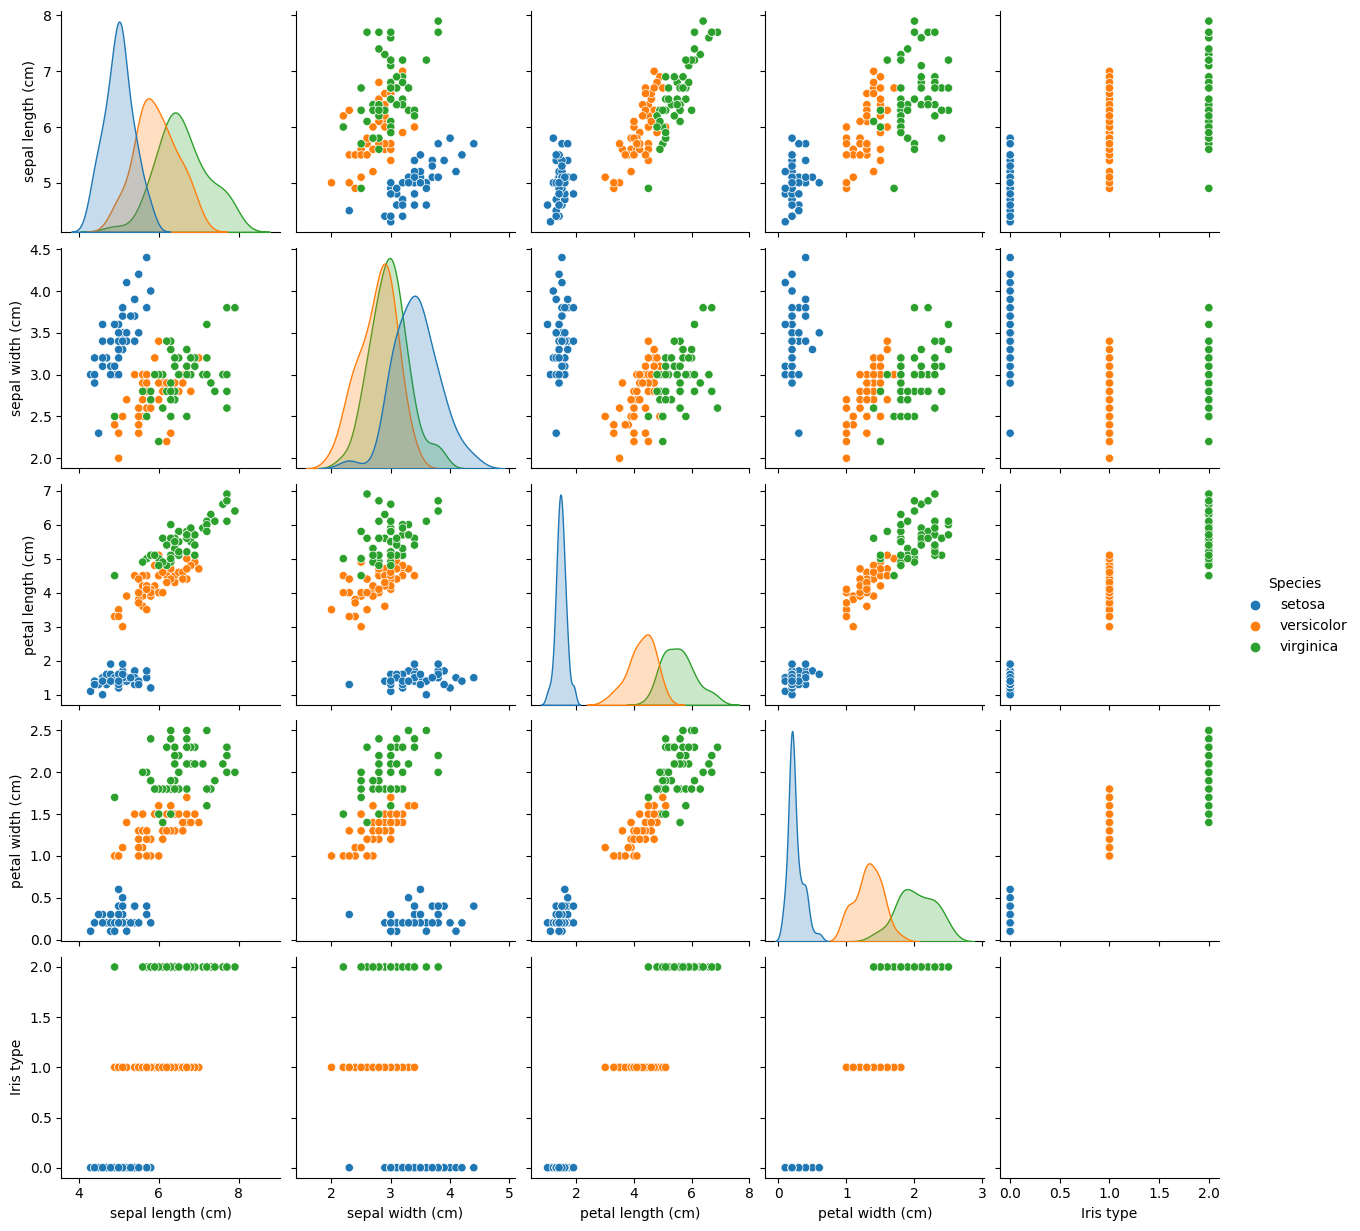

In [76]:
import seaborn as sns
sns.pairplot(iris_df,hue='Species')

### Next Steps in Analysis

Classification on the Iris dataset is relatively easy, with many algorithms achieving accuracy up to 98%. To make the classification task more challenging, we will follow these steps:

1. **Plot Scatter Plot with All Numerical Features**:
    - We will start by plotting a scatter plot of all the numerical features in the dataset. This will help us visualize the relationships and overlaps between different species.

2. **Select Features for Classification**:
    - Based on the scatter plot, we will select only two columns: `sepal length (cm)` and `sepal width (cm)`.
    - The reason for choosing these columns is that the classes `virginica` and `versicolor` for these two features appear to be very difficult to separate, as their points are overlapped.

3. **Exclude `setosa` Species**:
    - We will remove the `setosa` species from our dataset since it is easily classified. By focusing only on `virginica` and `versicolor`, we increase the complexity of the classification task.
    

In [77]:
new_iris_df = iris_df[iris_df['Iris type'] != 0][['sepal length (cm)','sepal width (cm)','Iris type']]


In [78]:
new_iris_df

,sepal length (cm),sepal width (cm),Iris type
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


## Model Building

In [79]:
X = new_iris_df.iloc[:,0:2]
y = new_iris_df.iloc[:, -1]

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [81]:
# creating object for the 3 algorithms

clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

- Creating an estimator object
- In sklearn.ensemble.VotingClassifier, we need to specify our base estimators
- The estimators need to be a list of tuples, where each tuple is (str, estimator)
- str - name of the algorithm, estimator - the object of the algorithm


In [82]:
estimators = [('lr', clf1), ('rf', clf2), ('knn', clf3)]

In [83]:
# Loop over the estimators
# Perform cross-validation for each estimator with 10 folds
# Calculate the mean accuracy for each algorithm

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.75
rf 0.63
knn 0.62


## Voting Classifier

In [84]:
from sklearn.ensemble import VotingClassifier


### Hard Voting

In [85]:
# Creating a VotingClassifier object with hard voting
# The default voting type is 'hard'
# Perform cross-validation with 10 folds and calculate the mean accuracy

vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.67


- we got an accuracy of 67%
- so not necessarily voting classifier will be the best classifier
- in this case logistic regression performed better
- still will try soft voting 

### Soft Voting

In [86]:
# Creating a VotingClassifier object with soft voting
# Perform cross-validation with 10 folds and calculate the mean accuracy

vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.66


- accuracy is even worst than hard voting 

### Weighted Voting
- There's one more hyperparameter called `weights` in `sklearn.ensemble.VotingClassifier`.
- By default, each base model gets equal weights.
- If we want, we can assign different weights. For example, if model 1 has weight 2 and model 2 has weight 1, then model 1 is considered twice as important as model 2.
- In the following code, since we have 3 different models, we run a range of 1 to 3 for `i`, `j`, and `k`.
- We insert `i`, `j`, and `k` into the `weights` parameter.
- The loop will run, and according to the loop, it will calculate the accuracy.


In [87]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.65
for i=1,j=1,k=2 0.65
for i=1,j=1,k=3 0.66
for i=1,j=2,k=1 0.61
for i=1,j=2,k=2 0.63
for i=1,j=2,k=3 0.65
for i=1,j=3,k=1 0.61
for i=1,j=3,k=2 0.63
for i=1,j=3,k=3 0.64
for i=2,j=1,k=1 0.68
for i=2,j=1,k=2 0.66
for i=2,j=1,k=3 0.67
for i=2,j=2,k=1 0.65
for i=2,j=2,k=2 0.66
for i=2,j=2,k=3 0.65
for i=2,j=3,k=1 0.63
for i=2,j=3,k=2 0.64
for i=2,j=3,k=3 0.64
for i=3,j=1,k=1 0.71
for i=3,j=1,k=2 0.69
for i=3,j=1,k=3 0.69
for i=3,j=2,k=1 0.68
for i=3,j=2,k=2 0.66
for i=3,j=2,k=3 0.65
for i=3,j=3,k=1 0.65
for i=3,j=3,k=2 0.66
for i=3,j=3,k=3 0.64


- If we see the maximum accuracy, it is achieved for `i=3, j=1, k=1`, i.e., 0.7, so we gave more weight to Logistic Regression, and it performed well.
- It makes sense since Logistic Regression performs well, so if we give it more weight, there's a chance it will perform better.
- By manipulating weights, we can achieve better results.


- This was one of the approaches where we bring different algorithms and apply the Voting Classifier.

### Approach 2
- When working with any particular algorithm, we need to tune hyperparameters.
- Tuning hyperparameters is a big challenge because it's difficult to get the right values.
- In the code below, we created a dataset.
- Here, we used Support Vector Machine (SVM) with a polynomial kernel and tuned the degree hyperparameter to get the best result.
- We will use the Voting Classifier.
- We run SVM with different degrees on the same dataset to generate accuracy.
- Then, we pick all 5 SVM models with different degrees and put them in the Voting Classifier to achieve better results.


In [88]:
from sklearn.svm import SVC


In [89]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [90]:
vc1 = VotingClassifier(estimators=estimators)
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.91


In [91]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93


- We are getting better results using both hard and soft voting, with soft voting providing better results.
- Soft voting softens the decision boundary, which can sometimes lead to better performance compared to hard voting.
